## Load our dataset using huggingface's load_dataset

Using custom data configuration default


0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /Users/matthewwhite/.cache/huggingface/datasets/csv/default-02088fbab6ef348f/0.0.0/ede98314803c971fef04bcee45d660c62f3332e8a74491e0b876106f3d99bd9b. Subsequent calls will reuse this data.
dict_keys(['train', 'validation'])
Size of train dataset:  (6000, 3)
Size of Validation dataset:  (3000, 3)
dict_keys(['', 'title', 'maintext'])
 Example of text:  NIBBLE OF NEW YORK I don’t have a set schedule. But we go on these long walks. We just kind of snake our way through the Lower East Side, parts of the East Village, through SoHo, come up through Chelsea. And we bring people with us, and it’s a way to introduce people to new things. It’s about trying to do as much as we can in one day, but in bite-sized increments. Like we’ll stop at La Esquina and get a horchata. You’ll walk down Orchard Street and stop at four different galleries. We’ll go to Hester Street and each have one dumpling. You might have seven appetizers over the course of the day and stop 

  0%|          | 0/1 [00:00<?, ?it/s]

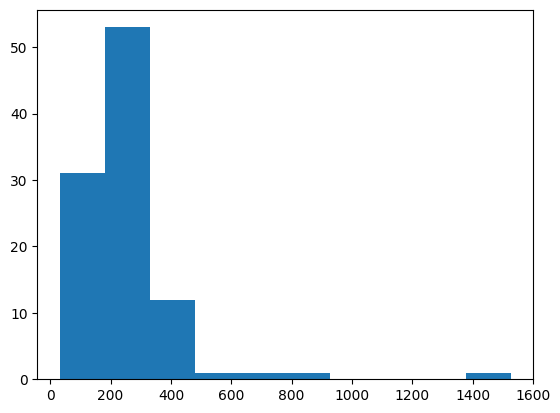

In [72]:
from nlp import load_dataset
#dataset = load_dataset('csv', data_files={'train':'nyt_train.csv','test':'nyt_val.csv'})
dataset = load_dataset('csv', data_files={'train':'nyt_train.csv','validation':'nyt_val.csv'},delimiter='~')
print(dataset.keys())
print("Size of Train dataset: ", dataset['train'].shape)
print("Size of Validation dataset: ", dataset['validation'].shape)
## Look at Sample Examples
print(dataset['train'][0].keys())
print(" Example of text: ", dataset['train'][0]['maintext'])
print(" Example of Summary: ", dataset['train'][0]['title'])
## Estimate Average Length of Text and Summary
tiny_dataset = dataset['train'].select(list(range(0, 100)))
text_len = []
summary_len=[]
for i in range(len(tiny_dataset)):
    example = tiny_dataset[i]
    text_example = example['maintext']
    text_example = text_example.replace('\n','')
    text_words = text_example.split()
    text_len.append(len(text_words))
    summary_example = example['title']
    summary_example = summary_example.replace('\n','')
    summary_words = summary_example.split()
    summary_len.append(len(summary_words))

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(text_len)
plt.show()